In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math as mth
import scipy.stats as stats

import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    
except:
    hypothesis = pd.read_csv('/Users/vadimhlebnikov/Downloads/hypothesis.csv')
    visitors = pd.read_csv('/Users/vadimhlebnikov/Downloads/visitors.csv')
    orders = pd.read_csv('/Users/vadimhlebnikov/Downloads/orders.csv')
    

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


## Содержание
* [Приоритизация гипотез](#chapter1)
* [Анализ A/B-теста](#chapter2)
 * [Кумулятивная выручка по группам ](#chapter3)
 * [Кумулятивный средний чек по группам](#chapter4)
 * [Кумулятивная конверсия по группам](#chapter5)
 * [Количество заказов по пользователям](#chapter6)
 * [Анализ конверсии и ее статзначимости](#chapter7)
 * [Статзначимость различий в среднем чеке между сегментами](#chapter8)
 * [Исключение выбросов и корректировка данных](#chapter9)Исключение выбросов и корректировка данных
* [Общие выводы](#chapter10)



## Приоритизация гипотез <a class ="anchor" id="chapter1"></a>

In [2]:
hypothesis.columns = hypothesis.columns.str.lower()

In [3]:
#Сортируем гипотезы по методике ICE
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hyp = hypothesis[['hypothesis','ice']].sort_values('ice',ascending = False).reset_index()
hyp['ice'] = hyp['ice'].round(2)
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 
hyp

,index,hypothesis,ice
0,8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
1,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
2,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
4,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
6,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
7,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно приоретизации по фреймворку ICE, наиболее приоритетными стоит сделать гипотезы:

1. Запустить акцию, дающую скидку на товар в день рождения.


2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.


3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [4]:
#Сортируем гипотезы по методике RICE
hypothesis['rice'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hyp2 = hypothesis[['hypothesis','rice']].sort_values('rice',ascending = False).reset_index()
hyp2

,index,hypothesis,rice
0,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [5]:
merged_hyp = hyp.merge(hyp2, left_on = 'hypothesis',right_on = 'hypothesis' )[['hypothesis','ice','rice']].sort_values('rice',ascending = False)

cm = sns.light_palette("blue", as_cmap=True)
merged_hyp.style.background_gradient(cmap=cm)


,hypothesis,ice,rice
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
0,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


Тройка наиболее приоритетных гипоте после приоретизации их методологии RICE:

1.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.  

2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

3.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**По методикам ICE и RICE в тройку приоритетных гипотез входят гипотезы по добавлению форму подписки на все основные страницы и вовлечение двух каналов привлечения трафика**. При расчете по методологии RICE из числа приоритетных гипотез фреймворка ICE выпадает предложение по предоставлению скидок на день рождения из-за очень низкого охвата этой гипотезы. Занимавшее третье место по ICE добавление формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, выходит на первое местов по RICE из-за максимального охвата (10 из 10).

## Анализ A/B-теста <a class ="anchor" id="chapter2"></a>

In [6]:
# Меняем тип данных в столбцах на datetime и делаем проверку
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print(orders.info())
print(visitors.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [7]:
orders.duplicated().sum()

0

In [8]:
visitors.duplicated().sum()

0

In [9]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [10]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [11]:
len(orders)

1197

In [12]:
#Поверяем наличие одних и тех же клиентов в двух группах
two_group_clients = orders.groupby('visitorId').group.nunique().sort_values(ascending=False).reset_index()
two_group_clients = two_group_clients.query('group > 1')
orders=orders[np.logical_not(orders['visitorId'].isin(two_group_clients['visitorId']))]
len(two_group_clients)


58

In [13]:
len(orders)

1016

В представленных датасетах нет дубликатов и пропусков. При этом есть 58 покупателей, которые одновременно попали в две группы. Они были исключены из датасета с заказами в итоге его динна сокралилась на 181 строк или на 15%.

### Кумулятивная выручка по группам <a class ="anchor" id="chapter3"></a>

In [14]:
# Создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [15]:
# Агрегируем данные по заказам
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


In [16]:
# Агрегируем данные по посетителям
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [17]:
#Объединяем данные в один датафрейм
cumulative_data = orders_aggregated.merge(visitors_aggregated,left_on = ['date','group'],right_on = ['date','group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

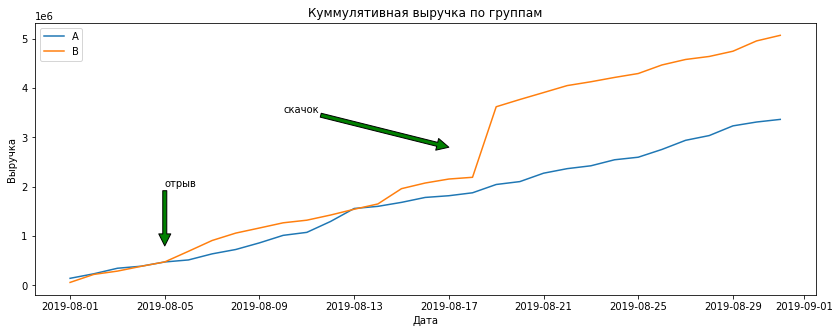

In [18]:
#построим графики куммулятивной выручки по группам 
cumulative_revenue_a = cumulative_data.query('group == "A"')[['date','revenue','orders']]
cumulative_revenue_b = cumulative_data.query('group == "B"')[['date','revenue','orders']]
plt.figure(figsize=(14, 5))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue'],label='A')
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue'],label='B')
plt.legend()
plt.title('Куммулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.annotate('скачок', xy=(dt.datetime(2019, 8, 17), 2800000), xytext=(dt.datetime(2019, 8, 10), 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=(dt.datetime(2019, 8, 5), 800000), xytext=(dt.datetime(2019, 8, 5), 2000000),
            arrowprops=dict(facecolor='g'))
plt.show()

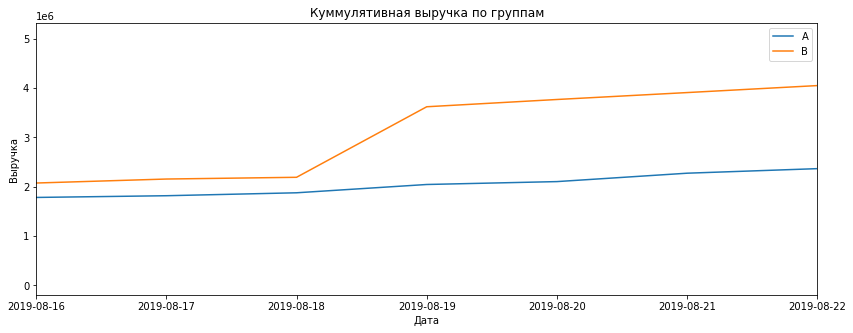

In [19]:
#Рассмотрим подробнее диапазон скачка. Он происходит 19 августа
cumulative_revenue_a = cumulative_data.query('group == "A"')[['date','revenue','orders']]
cumulative_revenue_b = cumulative_data.query('group == "B"')[['date','revenue','orders']]
plt.figure(figsize=(14, 5))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue'],label='A')
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue'],label='B')
plt.xlim([dt.datetime(2019, 8, 16), dt.datetime(2019, 8, 22)])
plt.legend()
plt.title('Куммулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Выручка по группам равномерно растет с неболшим опережением в группе B, но **между 17 и 21 августа фиксируется резкий прирост выручки в группе B (либо резкий рост числа заказов, либо суммы)**. Далее выручка продолжает расти почти синхронно в обеих группах, что говорит об отсутствии в группе B заметного на данном этапе роста выручки и необходимости исключить выбросы.

### Кумулятивный средний чек по группам <a class ="anchor" id="chapter4"></a>

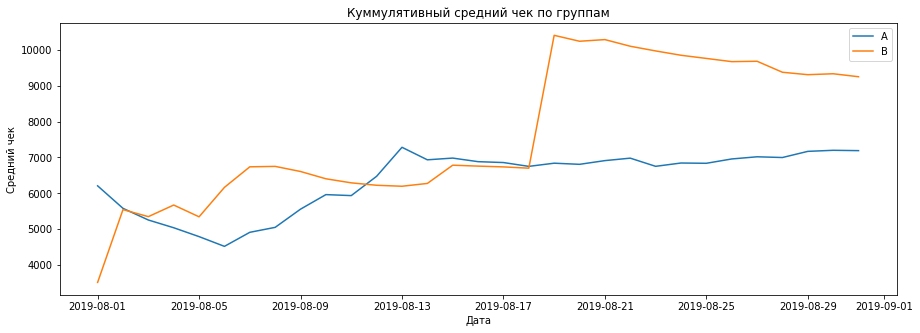

In [20]:
#Строим график кумулятивного среднего чека по группам
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend() 
plt.title('Куммулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

**На графиках динамики среднего чека мы также видим болшой выброс между 17 и 21 августа в группе B**. Если в группе А кумулятивный средний чек плавно растет, то в группе B после резкого выброса он постепенно падает, что может свидетельствовать о корректировке к нормальным значениям после аномального выброса. Тренды изменения показателей до выброса были схожи. 

Необходимо очистить данные от выбросов, чтобы более четко понимать динамику изменения кумулятивных данных.

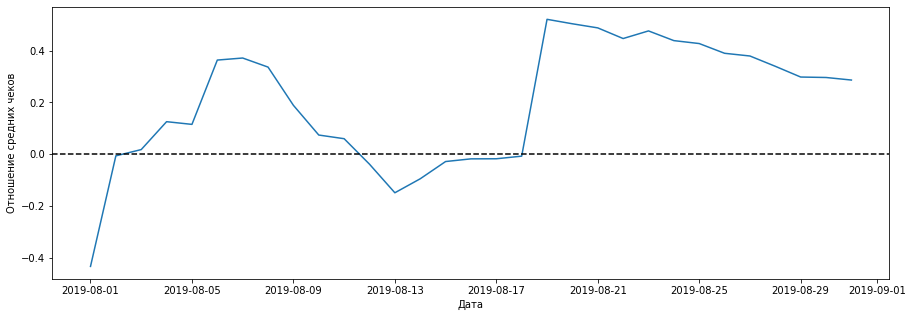

In [21]:
# объединим данные по группам
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# Выводим соотношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_revenue['date'], ((merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1))
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')
plt.show()


График отношений средних чеков подчеркивает резкие относительне скачки, что также указывает на необходимость идентификации выбросов.

### Кумулятивная конверсия по группам <a class ="anchor" id="chapter5"></a>

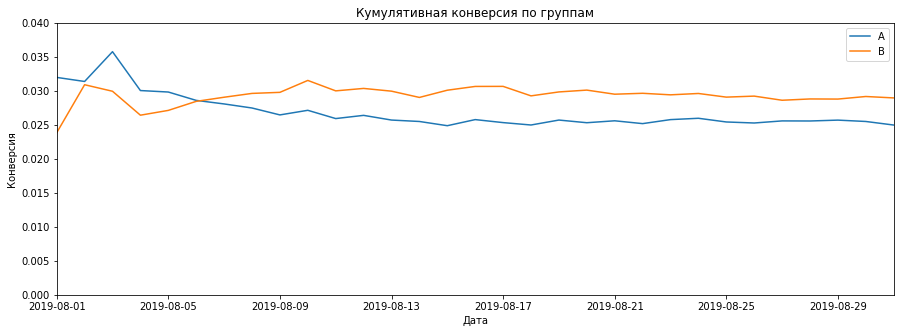

In [22]:
# Расчет кумулятивной конверсии
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Выделяем группу A
cumulative_data_a = cumulative_data.query('group =="A"')

# Выделяем группу B
cumulative_data_b = cumulative_data.query('group =="B"')

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
# задаем масштаб осей
plt.axis([min(cumulative_data_a['date']), max(cumulative_data_a['date']), 0, 0.04])
plt.show()

До примерно 5 августа конверсии колеблются, а затем ситуация стабилизируется и группа B начинает явно лидиовать и это лидерство примерно в 0,5 процентных пункта сохраняется до конца теста.

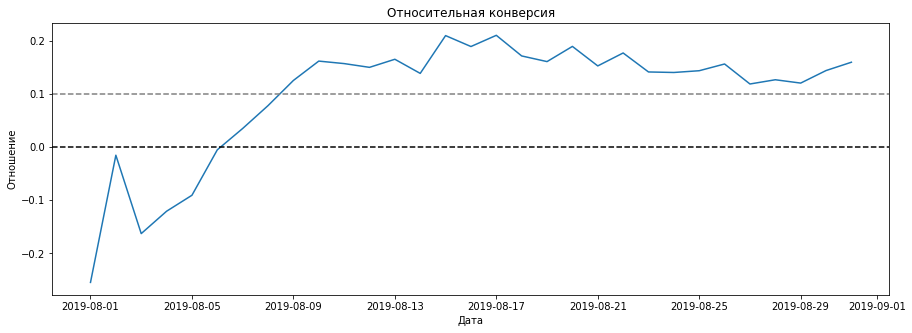

In [23]:
#Строим график относительного различия конверсий
merged_cumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_сonversions['date'], merged_cumulative_сonversions['conversion_b']/merged_cumulative_сonversions['conversion_a']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительная конверсия')
plt.xlabel('Дата')
plt.ylabel('Отношение')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()


В начале эксперимента группа B проигрывала по конверсии группе A, но после 5-го августа заметен резкий рост различия в конверсии в пользу группы B. Потом фиксируется коррекция вниз и ближе к концу эксперимента разница установилась примерно в размере 10%, и сравнительно стабилизировалась.

### Количество заказов по пользователям <a class ="anchor" id="chapter6"></a>

In [24]:
#Сортируем пользователей по числу заказов
orders_by_users = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'}))

orders_by_users.columns = ['user_id','orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)


,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [25]:
users_range = pd.Series(range(0,len(orders_by_users)))

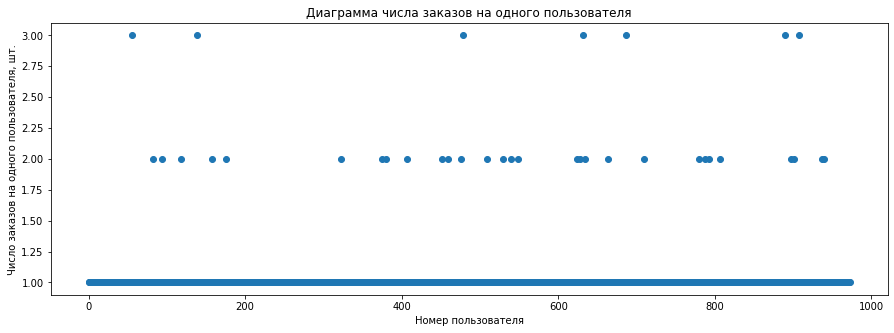

In [26]:
#Строим диаграмму числа заказов по пользователям
plt.figure(figsize=(15, 5))
plt.scatter(users_range, orders_by_users['orders'])
plt.title('Диаграмма числа заказов на одного пользователя')
plt.xlabel('Номер пользователя')
plt.ylabel('Число заказов на одного пользователя, шт.')
plt.show()

**Подавляющее число пользователей в период теста заказывали не более трех раз**. Но для более точной оценке выбросов лучше расчитать 95 и 99 процентели.

In [27]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


**Менее 1% пользователей делали более двух заказов**. Это количество стоит выбрать в качестве границы для определения аномальных пользователей.

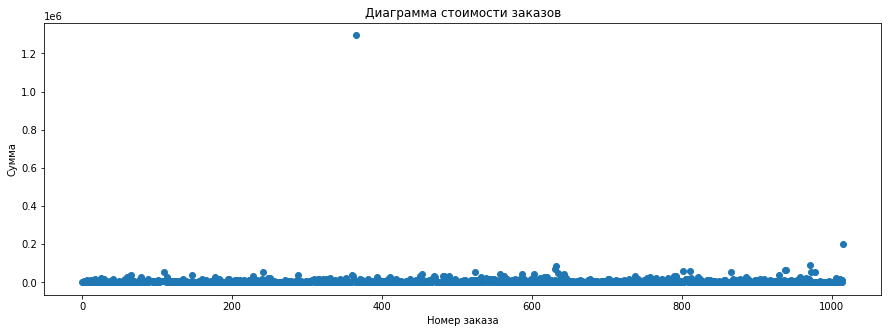

In [28]:
#Строим диаграмму стоимости заказов
plt.figure(figsize=(15, 5))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'])
plt.title('Диаграмма стоимости заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Сумма')
plt.show()

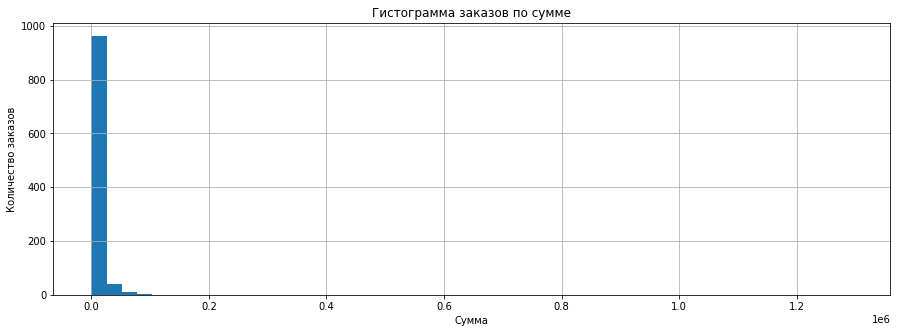

In [29]:
#Строим гистограмму заказов по сумме
plt.figure(figsize=(15, 5))
orders['revenue'].hist(bins=50)
plt.title('Гистограмма заказов по сумме')
plt.xlabel('Сумма')
plt.ylabel('Количество заказов')
plt.show()

In [30]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


In [31]:
len(orders.query('revenue > 54000'))

9

In [32]:
orders.query('revenue > 54000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
743,3603576309,4133034833,2019-08-09,67990,A
744,3668308183,888512513,2019-08-27,86620,B
940,2420050534,4003628586,2019-08-08,58550,B
949,1347999392,887908475,2019-08-21,60450,A
1099,316924019,148427295,2019-08-12,65710,A
1103,1348774318,1164614297,2019-08-12,66350,A
1136,666610489,1307669133,2019-08-13,92550,A
1196,3936777065,2108080724,2019-08-15,202740,B


**Менее 1% заказов имеют сумму более 53,9 тыс. руб.** Суммы подавляющего большинства заказов составляют менее 27 тыс. руб. Определяя в качестве цифры отсечения 54 тыс рублей, мы уберем 9 заказов. В том числе один на сумму 1,3 млн руб., сделанный 19 августа и отнесенный к группе B. **Весьма вероятно, что он и обуславливает резкий скачек выручки и среднего чека в группе B между 17 и 21 августа**.

### Анализ конверсии <a class ="anchor" id="chapter7"></a>

Сформулируем гипотезы для z-теста конверсии в покупку по группам.

*Нулевая гипотеза: различий в конверсии между группами нет*. 

*Альтернативная гипотеза: конверсии в двух группах отличаются*. 



In [33]:
#рассчитаем конверсию в покупку по группам по итогам периода
a_trials = cumulative_data.loc[60,'visitors']
b_trials = cumulative_data.loc[61,'visitors']
a_succeses = cumulative_data.loc[60,'orders']
b_succeses = cumulative_data.loc[61,'orders']

alpha = 0.05
p1 = a_succeses/a_trials
p2 = b_succeses/b_trials
p_combined = (a_succeses + b_succeses)/ (a_trials + b_trials)
difference = p1 - p2 

In [34]:
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / a_trials + 1 / b_trials)
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = stats.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

p-значение:  0.016851380434703023
Отвергаем нулевую гипотезу: между долями есть значимая разница


In [35]:
print(p1,p2,(p2/p1)-1)

0.02497865072587532 0.02897018397124128 0.1597977924896936


**Согласно результатам z-теста, разница в конверсиях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии**. Конверсии по группам составляют соответственно 2,5 и 2,9%.

Сформулирем гипотезы для оценке различий в числе заказов на пользователя на основе теста Манна-Уиттни.

*Нулевая гипотеза: различий в числе заказов на пользователя между группами нет*. 

*Альтернативная гипотеза: различия в числе заказов на пользователя есть*. 

In [36]:
#Проверяем статистическую значимость различий в количестве заказов на одного пользователя 

orders_by_users_a = orders.query('group == "A"').groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = orders.query('group == "B"').groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

orders_by_users_b.columns = ['userId', 'orders']

visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

sampleA = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
0.160


Значение p-value по тесту Манна-Уиттни составляет 0.011, что ниже порогового значения в 0.05, а значит **мы можем отвергнуть нулевую теорию и признать среднее число заказов на пользователя отличающимся**. Средняя конверсия пользователей в заказы отличается на 16% в пользу группы B.  

### Статзначимость различий в среднем чеке между сегментами <a class ="anchor" id="chapter8"></a>

In [37]:
#Проверяем статистическую значимость различий в среднем чеке между сегментами
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


Нулевая гипотеза: различий в среднем чеке между группами нет. 
Альтернативная гипотеза: различия в среднем чеке между группами есть.
Не смотря на сравнительно большую разницу средних (29%), **мы не можем отвергнуть нулевую гипотезу об отсутствии различий в средних чеках** из-за того, что p-value равно 0.829, что значительно превышает уровен alpha 0.05.

### Исключение выбросов и корректировка данных <a class ="anchor" id="chapter9"></a>

In [38]:
#Определим пользователей с аномальной стоимсотью и числом заказов  и посчитаем статистическую значимость различий в среднем чеке и конверсии между сегментами без них
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['userId'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['userId'],
    ],
    axis=0,
)
users_expensive_orders = orders[orders['revenue'] > 54000]['visitorId']
abnormal_users = (
    pd.concat([users_with_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape[0])

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


В общей сложности вявлено 16 аномальных покупателей, которых нужно исключить из анализа для корректировки результатов.

In [39]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['userId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [40]:
print('{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

0.007
0.189


Значение p-value по тесту Манна-Уиттни после удаления выросов уменьшилось до 0.007, **подтвердив верность вывода о неравенстве конверсий пользователей в заказы между группами**. Относительная разница между конверсиями выросла после корректировки до 18,9%. (до корректировки - 16% в пользу группы B).

In [41]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.788
-0.032


После исключения "аномальных" покупателей разница средних чеков значительно снизилась (с 29 до 3,2%). P-value скорректировался до 0.788 и еще сильнее превышает пороговое значение в 0.05. **Поэтому нулевая гипотеза об отсутствии разницы средних чеков не может быть отвергнута**.

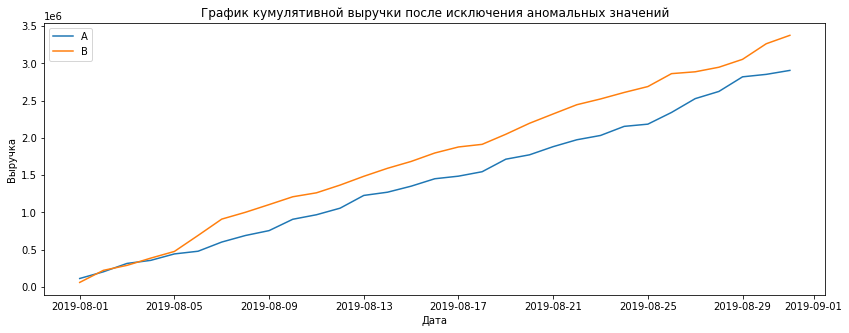

In [42]:
#Пересчитаем данные для графиков выручки c учетом исключения аномальных данных
orders = orders[
            np.logical_not(orders['visitorId'].isin(abnormal_users))
        ]
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

cumulative_data = orders_aggregated.merge(visitors_aggregated,left_on = ['date','group'],right_on = ['date','group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_revenue_a = cumulative_data.query('group == "A"')[['date','revenue','orders']]
cumulative_revenue_b = cumulative_data.query('group == "B"')[['date','revenue','orders']]

plt.figure(figsize=(14, 5))
plt.plot(cumulative_revenue_a['date'],cumulative_revenue_a['revenue'],label='A')
plt.plot(cumulative_revenue_b['date'],cumulative_revenue_b['revenue'],label='B')
plt.legend()
plt.title('График кумулятивной выручки после исключения аномальных значений')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

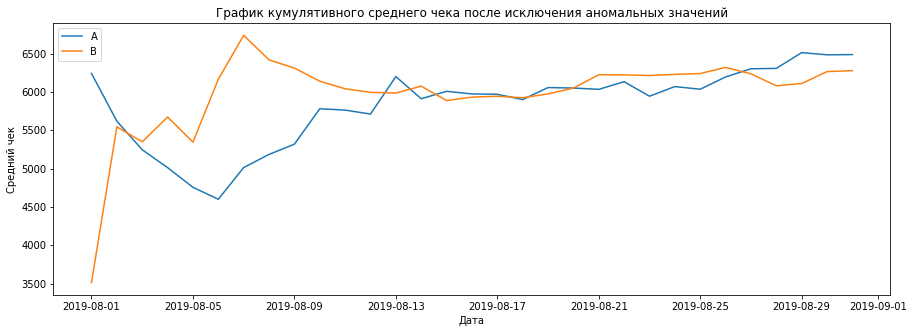

In [43]:
#Строим график кумулятивного среднего чека по группам
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend() 

plt.title('График кумулятивного среднего чека после исключения аномальных значений')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Text(0, 0.5, 'Отношение средних чеков')

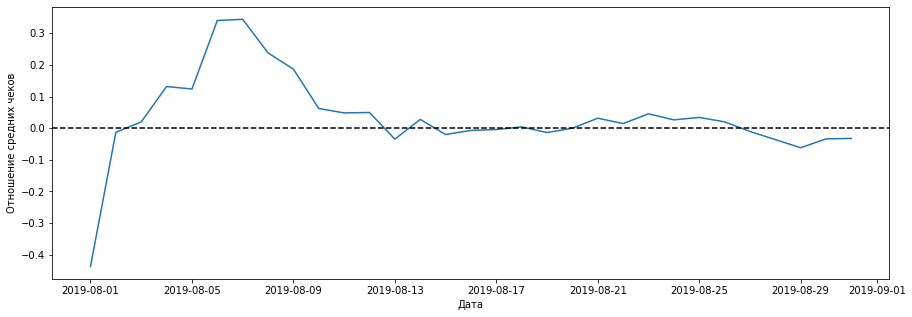

In [44]:
# объединим данные по группам
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# Выводим соотношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_revenue['date'], ((merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1))
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Отношение средних чеков')


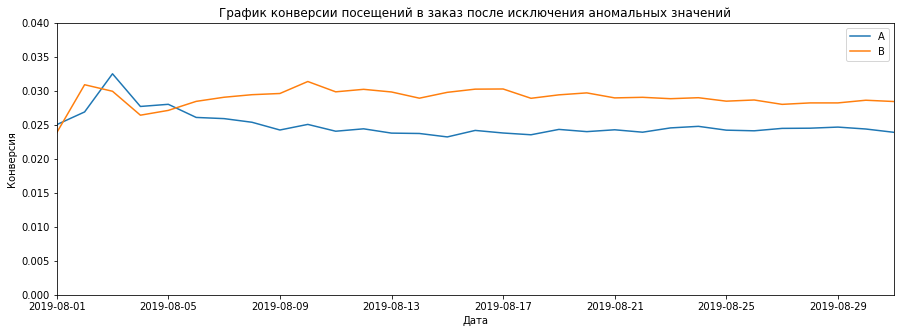

In [45]:
# Расчет кумулятивной конверсии
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# Выделяем группу A
cumulative_data_a = cumulative_data.query('group =="A"')

# Выделяем группу B
cumulative_data_b = cumulative_data.query('group =="B"')

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

plt.title('График конверсии посещений в заказ после исключения аномальных значений')
plt.xlabel('Дата')
plt.ylabel('Конверсия')

# задаем масштаб осей
plt.axis([min(cumulative_data_a['date']), max(cumulative_data_a['date']), 0, 0.04])
plt.show()

На графиках видно, что ислючения аномалий нормализовало данные. Разница в средних чеках под конец исследования фактически сошла на нет, что было подтверждено результатами статистических тестов, а раница в конверсии оказалась сущственной и статистически значимой, что в итоге вылилось в значительное превосходство группы B по кумулятивной выручке. **Сами показатели стабилизировались, а выборки были достаточного размера для анализа. На этом основании тест можно остановить и признать успешным**.


## Общие выводы <a class ="anchor" id="chapter10"></a>

1. Согласно приоретизации по фреймворку ICE, наиболее приоритетными стоит сделать гипотезы:

Запустить акцию, дающую скидку на товар в день рождения.
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

Тройка наиболее приоритетных гипоте после приоретизации их методологии RICE:

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.

3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**"Пересекаются" гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". С них и стоит начать работу по тестированию гипотез**.

2. В представленных датасетах нет дубликатов и пропусков. При этом есть 58 покупателей, которые одновременно попали в две группы. Они были исключены из датасета с заказами в итоге его динна сокралилась на 181 строк или на 15%.

3. Данные A/B-теста показывают, что выручка по группам равномерно растет с неболшим опережением в группе B, но между 17 и 21 августа фиксируется резкий прирост выручки в группе B (либо резкий рост числа заказов, либо суммы). Скачек поисходит 19 августа. Далее выручка продолжает расти почти синхронно в обеих группах, что говорит об отсутствии в группе B заметного на данном этапе роста выручки и необходимости исключить выбросы.


4. **На графиках динамики среднего чека мы также видим болшой выброс между 17 и 21 августа в группе B**. Если в группе А кумулятивный средний чек плавно растет, то в группе B после резкого выброса он постепенно падает, что может свидетельствовать о корректировке к нормальным значениям после аномального выброса. Тренды изменения показателей до выброса были схожи. 


5. До примерно 5 августа конверсии колеблются, а затем ситуация стабилизируется и группа B начинает явно лидиовать и это лидерство примерно в 0,5 процентных пункта сохраняется до конца теста. Ближе к концу эксперимента разница установилась примерно в размере 10%, и сравнительно стабилизировалась.


6. Менее 1% пользователей делали более двух заказов. Это количество стоит выбрать в качестве границы для определения аномальных пользователей. Менее 1% заказов имеют сумму более 54 тыс. руб. Суммы подавляющего большинства заказов составляют менее 27 тыс. руб. Определяя в качестве цифры отсечения 54 тыс рублей, мы уберем 9 заказов. В том числе один на сумму 1,3 млн руб., сделанный 19 августа и отнесенный к группе B. Всего были отсечены заказы 16 покупателей (в том числе из-заа аномального числа заказов).


7. Согласно результатам z-теста, разница в конверсиях при указанных размерах выборок достаточна, чтобы говорить о статистически значимом различии. Конверсии по группам составляют соответственно 2.5 и 2,9%. Значение p-value по тесту Манна-Уиттни составляет 0.011, что ниже порогового значения в 0.05, а значит **мы можем отвергнуть нулевую теорию и признать среднее число заказов на пользователя отличающимся**. Средняя конверсия пользователей в заказы отличается на 16% в пользу группы B. После очистки от аномальных данных показатели меняются незначительно: p-value = 0.007, разница между конверсиями составляет 18,9%.


8. Мы не можем отвергнуть нулевую гипотезу о том, что различий в среднем чеке между группами нет. Не смотря на сравнительно большую разницу средних в "сырых" данных (29%), мы не можем отвергнуть нулевую гипотезу об отсутствии различий в средних чеках из-за того, что p-value равно 0.829, что значительно превышает уровень alpha 0.05. **После очистки данных разница средних чеков снижается до 3,2%. P-value корректируется до 0.788, что указывает на отсутствие разницы в средних чеках между группами**.


9. Графики построенные после исключения аномальных значений показывают, что разница в средних чеках под конец исследования фактически сошла на нет, что было подтверждено результатами статистических тестов, а разница в конверсии оказалась существенной и статистически значимой, что в итоге вылилось в значительное превосходство группы B по кумулятивной выручке. Сами показатели стабилизировались, а выборки были достаточного размера для анализа. **На этом основании тест можно остановить и признать успешным**.